In [2]:
from sklearn import svm, preprocessing
#from statsmodels.api import datasets
from sklearn import datasets ## Get dataset from sklearn
import sklearn.model_selection as ms
import sklearn.metrics as sklm
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import numpy.random as nr

%matplotlib inline

In [3]:
import pandas as pd
skin = pd.read_csv("skin4.csv")

skin.columns = ['eating_habit', 'sleeping_habit', 'on_skin_regimen','Yoga', 'skin_health_type']

skin.head()

,eating_habit,sleeping_habit,on_skin_regimen,Yoga,skin_health_type
0,6.3,8.5,1.4,37,clear_and_glowing
1,5.8,8.0,1.4,40,clear_and_glowing
2,7.1,8.2,1.3,38,clear_and_glowing
3,6.3,8.1,1.5,40,clear_and_glowing
4,6.5,8.6,1.4,29,clear_and_glowing


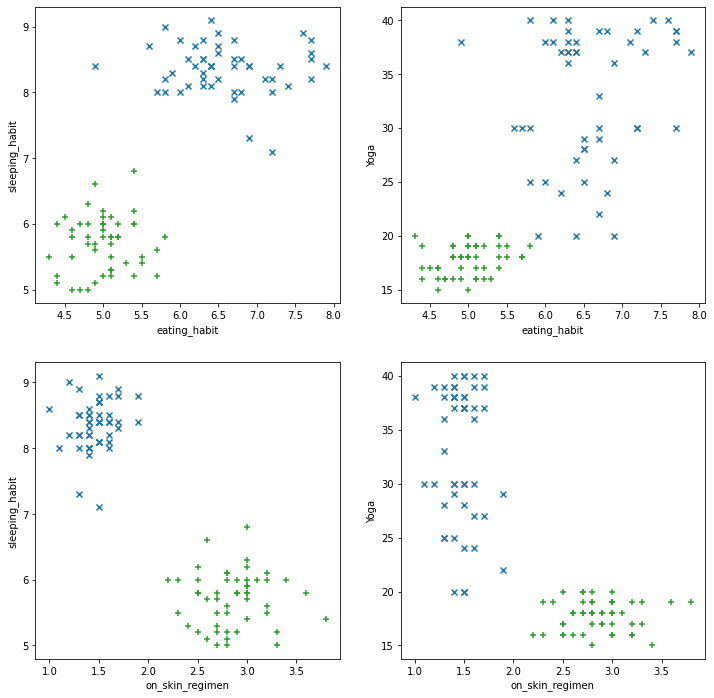

In [4]:
def plot_skin(skin):
    
    
    clear_and_glowing = skin[skin['skin_health_type'] == 'clear_and_glowing']
    acne = skin[skin['skin_health_type'] == 'acne']
    irritated_and_acne = skin[skin['skin_health_type'] == 'irritated_and_acne']
    fig, ax = plt.subplots(2, 2, figsize=(12,12))
    x_ax = ['eating_habit', 'on_skin_regimen']
    y_ax = ['sleeping_habit', 'Yoga']
    for i in range(2):
        for j in range(2):
            ax[i,j].scatter(clear_and_glowing[x_ax[i]], clear_and_glowing[y_ax[j]], marker = 'x')
            ax[i,j].scatter(acne[x_ax[i]], acne[y_ax[j]], marker = 'o')
            ax[i,j].scatter(irritated_and_acne[x_ax[i]], irritated_and_acne[y_ax[j]], marker = '+')
            ax[i,j].set_xlabel(x_ax[i])
            ax[i,j].set_ylabel(y_ax[j])
            
   
plot_skin(skin)   

In [5]:
skin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   eating_habit      150 non-null    float64
 1   sleeping_habit    150 non-null    float64
 2   on_skin_regimen   150 non-null    float64
 3   Yoga              150 non-null    int64  
 4   skin_health_type  150 non-null    object 
dtypes: float64(3), int64(1), object(1)
memory usage: 6.0+ KB


In [6]:
skin['count'] = 1
skin[['skin_health_type', 'count']].groupby('skin_health_type').count()

,count
skin_health_type,
acne,50
clear_and_glowing,50
irritated_and_acne,50


In [7]:
Features = np.array(skin[['eating_habit', 'sleeping_habit', 'on_skin_regimen','Yoga']])

levels = {'clear_and_glowing':0, 'acne ':1, 'irritated_and_acne':2, 'dry':3}
Labels =  np.array([levels[x] for x in skin['skin_health_type']])

In [8]:
## Randomly sample cases to create independent training and test data
nr.seed(1115)
indx = range(Features.shape[0])
indx = ms.train_test_split(indx, test_size = 100)
X_train = Features[indx[0],:]
y_train = np.ravel(Labels[indx[0]])
X_test = Features[indx[1],:]
y_test = np.ravel(Labels[indx[1]])

In [9]:
scale = preprocessing.StandardScaler()
scale.fit(X_train)
X_train = scale.transform(X_train)

In [10]:
nr.seed(1115)
svm_mod = svm.LinearSVC()
svm_mod.fit(X_train, y_train)

LinearSVC()

In [11]:
X_test = scale.transform(X_test)
scores = svm_mod.predict(X_test)

In [12]:
def print_metrics_3(labels, scores):
   
    conf = sklm.confusion_matrix(labels, scores)
    print('                 Confusion matrix')
    print('                 Score clear_and_glowing   Score acne     Score irritated_and_acne')
    print('Actual clear_and_glowing      %6d' % conf[0,0] + '            %5d' % conf[0,1] + '             %5d' % conf[0,2])
    print('Actual acne                   %6d' % conf[1,0] + '            %5d' % conf[1,1] + '             %5d' % conf[1,2])
    print('Actual irritated_and_acne     %6d' % conf[2,0] + '            %5d' % conf[2,1] + '             %5d' % conf[2,2])
    ## Now compute and display the accuracy and metrics
    print('')
    print('Accuracy        %0.2f' % sklm.accuracy_score(labels, scores))
    metrics = sklm.precision_recall_fscore_support(labels, scores)
    print(' ')
    print('          Actual clear_and_glowing  acne  irritated_and_acne')
    print('Num case   %0.2f' % metrics[3][0] + '     %0.2f' % metrics[3][1] + '      %0.2f' % metrics[3][2])
    print('Precision   %0.2f' % metrics[0][0] + '      %0.2f' % metrics[0][1] + '       %0.2f' % metrics[0][2])
    print('Recall      %0.2f' % metrics[1][0] + '      %0.2f' % metrics[1][1] + '       %0.2f' % metrics[1][2])
    print('F1          %0.2f' % metrics[2][0] + '      %0.2f' % metrics[2][1] + '       %0.2f' % metrics[2][2])
    
print_metrics_3(y_test, scores)   

                 Confusion matrix
                 Score clear_and_glowing   Score acne     Score irritated_and_acne
Actual clear_and_glowing          35                0                 0
Actual acne                        0               32                 2
Actual irritated_and_acne          0                2                29

Accuracy        0.96
 
          Actual clear_and_glowing  acne  irritated_and_acne
Num case   35.00     34.00      31.00
Precision   1.00      0.94       0.94
Recall      1.00      0.94       0.94
F1          1.00      0.94       0.94


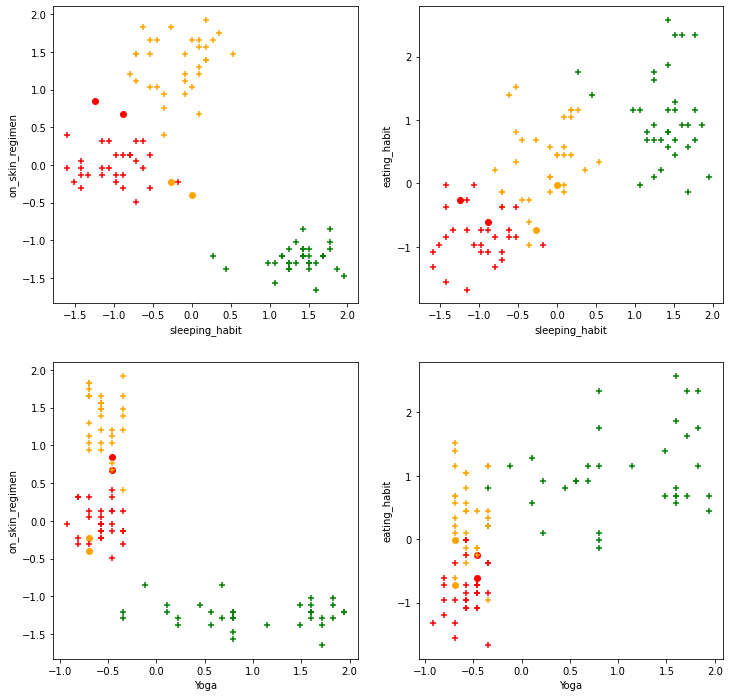

In [13]:
def plot_skin_score(skin, y_test, scores):
    
    ## Find correctly and incorrectly classified cases
    true = np.equal(scores, y_test).astype(int)
    
    ## Create data frame from the test data
    skin = pd.DataFrame(skin)
    levels = {0:'clear_and_glowing', 1:'acne', 2:'irritated_and_acne'}
    skin['skin_health_type'] = [levels[x] for x in y_test]
    skin.columns = ['eating_habit', 'sleeping_habit', 'on_skin_regimen', 'Yoga','skin_health_type']
    
    ## Set up for the plot
    fig, ax = plt.subplots(2, 2, figsize=(12,12))
    markers = ['o', '+']
    x_ax = ['sleeping_habit','Yoga']
    y_ax = ['on_skin_regimen', 'eating_habit']
    
    for t in range(2): # loop over correct and incorect classifications
        clear_and_glowing = skin[(skin['skin_health_type'] == 'clear_and_glowing') & (true == t)]
        acne = skin[(skin['skin_health_type'] == 'acne') & (true == t)]
        irritated_and_acne = skin[(skin['skin_health_type'] == 'irritated_and_acne') & (true == t)]
        # loop over all the dimensions
        for i in range(2):
            for j in range(2):
                ax[i,j].scatter(clear_and_glowing[x_ax[i]], clear_and_glowing[y_ax[j]], marker = markers[t], color = 'green')
                ax[i,j].scatter(acne[x_ax[i]], acne[y_ax[j]], marker = markers[t], color = 'orange')
                ax[i,j].scatter(irritated_and_acne[x_ax[i]], irritated_and_acne[y_ax[j]], marker = markers[t], color = 'red')
                ax[i,j].set_xlabel(x_ax[i])
                ax[i,j].set_ylabel(y_ax[j])

plot_skin_score(X_test, y_test, scores)